# Figuras Capitulo 2 "The Elements of Statistical Learning"

Este notebook se dividirá en 6 partes:
- Simulación de datos
- Generación de todos los puntos de un gráfico
- Reproducción figura 2.1
- Reproducción figura 2.2
- Reproducción figura 2.3
- Reproducción figura 2.4

Inicialmente importamos la libreria necesaria

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import random

### Simulación de datos

In [28]:
def centros_asociados_a_cada_color(color, kcentros):
   
    centro = np.array([0,0])
    covarianza = np.identity(2)
    
    if color == 0: #azul
        centro = np.array([1,0])
    
    if color == 1: #rojo
        centro = np.array([0,1])

    lista_de_centros = np.random.multivariate_normal(centro,covarianza,kcentros).T
        
    return lista_de_centros

In [29]:
centros_azul = centros_asociados_a_cada_color(0,10)
centros_azul

array([[ 0.72742103,  2.90896744,  0.70501431, -0.60569621, -1.33283513,
         0.3850095 ,  1.66009141,  0.34418875, -0.28607335,  2.58234379],
       [-0.06626518, -0.41713177,  1.21933373, -0.30534971, -0.95253143,
        -0.38867705, -0.30496035,  0.17964134, -0.50356639,  0.19770477]])

In [30]:
centros_rojo = centros_asociados_a_cada_color(1,10)
centros_rojo

array([[-0.28203245, -0.00656931, -2.69417152, -1.32956924,  0.80670704,
        -1.35230098, -0.15366908, -1.18379981, -0.85011742,  0.5809747 ],
       [ 1.87164621,  0.46387833, -0.22714377,  1.1517328 ,  0.45068657,
         0.98607714,  0.60678512,  0.68140648,  0.87062724,  0.39604423]])

In [31]:
def visualize_colors(ptos_azul, ptos_rojo):

    x1azul = ptos_azul[0]
    x2azul = ptos_azul[1]
    
    x1rojo = ptos_rojo[0]
    x2rojo = ptos_rojo[1]
    
    plt.plot(x1azul,x2azul,"bo")
    plt.plot(x1rojo,x2rojo,"ro")
    plt.axis([-5,5,-5,5])
    plt.title("Distribucion de puntos segun el color")
    plt.show()

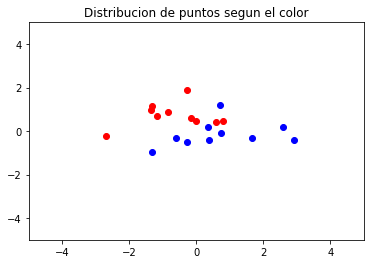

In [32]:
visualize_colors(centros_azul, centros_rojo)

In [33]:
def Simulacion_2(centros, N):
    
    Ncentros = centros.shape[1]
    
    #Initialize the list of observations 
    observations = np.zeros((2,N))
    
    #we first define the global value of the covariance
    covarianza = np.identity(2)/5
       
    #hacemos un loop entre 0 y N-1 para generar todos las observaciones requeridas
    
    for obs in range(0,N):
        #generamos un numero aleatorio entre 0 y 9 para escoger el centro de nuestra gaussiana bivariada
        indice_del_centro = random.randint(0, Ncentros-1)
        
        xcentro = centros[0,indice_del_centro]
        ycentro = centros[1,indice_del_centro]
        
        mk_centro = np.array([xcentro, ycentro])
        
        centro_aux = np.random.multivariate_normal(mk_centro,covarianza,1).T
    
        observations[0,obs] = centro_aux[0,0]
        observations[1,obs] = centro_aux[1,0]
    
    return observations

In [34]:
ptos_observados_azul =  Simulacion_2(centros_azul, 100)
ptos_observados_rojo =  Simulacion_2(centros_rojo, 100)

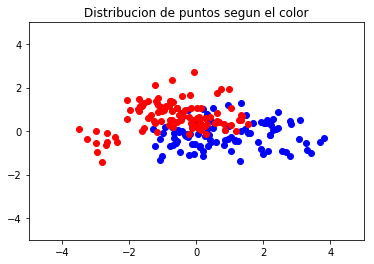

In [35]:
visualize_colors(ptos_observados_azul, ptos_observados_rojo)

Ahora generamos el SET que utilizaremos para la predicción

In [36]:
SET=[]

#Notar que estoy (BP) utilizando los puntos generados con la distribucion de gaussianas mezcladas. Ademas, 
#vamos a agregar directamente el valor de x0 al SET, por lo mencionado anteriormente. Ver notas adjuntas

#primero agregamos los vectores correspondientes a la distribución gaussiana azul (y=0) a la lista SET. 
x1azul = ptos_observados_azul[0,:]
x2azul = ptos_observados_azul[1,:]

x1rojo = ptos_observados_rojo[0,:]
x2rojo = ptos_observados_rojo[1,:]

for i in range(len(x1azul)):
    SET.append([1,x1azul[i],x2azul[i],0])

#Ahora agregamos los correspondientes a y=1 (distribución normal roja)
for i in range(len(x1rojo)):
    SET.append([1,x1rojo[i],x2rojo[i],1])

In [37]:
X=[]

#notice that now we have to put SET[i][1] y SET[i][2] en las componentes x1 y x2 de X
#on the other hand Y = SET[i][3]
for i in range(len(SET)):
    X.append([1,SET[i][1],SET[i][2]])

Y=[]
for i in range(len(SET)):
    Y.append(SET[i][3])

X=np.array(X)                     
Y=np.array(Y)

XT=X.transpose()

In [38]:
XTdotX = np.dot(XT,X)
XTdotX_inversa = np.linalg.inv(XTdotX)
XTdotX_inversa_dotXT = np.dot(XTdotX_inversa, XT)

In [39]:
beta_teorico = np.dot(XTdotX_inversa_dotXT,Y)
print(beta_teorico)

[ 0.43610521 -0.15364364  0.31162228]


In [40]:
def funcion_lineal(x1, x2, beta): 
    
    y_prediccion = beta[0] + x1*beta[1] + x2*beta[2]
    return y_prediccion  

In [41]:
lista_de_predicciones_azul = []
lista_de_predicciones_rojo = []

for pto in range(len(SET)):
    
    #prediccion de la funcion lineal como funcion de la posicion en el plano 2d y el valor teorico de beta
    #el cual se encontro minimizando algebraicamente RSS()

    prediccion = funcion_lineal(SET[pto][1], SET[pto][2], beta_teorico)

    #Utilizando el valor de la prediccion separamos entre puntos azules y rojos
    
    if (prediccion < 0.5):
        lista_de_predicciones_azul.append([SET[pto][1], SET[pto][2]])
    elif (prediccion == 0.5): #esto lo puse solo para ver si es que algún punto de la simulación debía ser catalogado como negro
        print("tenemos puntos negros")
    else:
        lista_de_predicciones_rojo.append([SET[pto][1], SET[pto][2]])

In [42]:
lista_de_predicciones_azul = np.array(lista_de_predicciones_azul)
lista_de_predicciones_azul_t = lista_de_predicciones_azul.transpose()
lista_de_predicciones_rojo = np.array(lista_de_predicciones_rojo)
lista_de_predicciones_rojo_t = lista_de_predicciones_rojo.transpose()

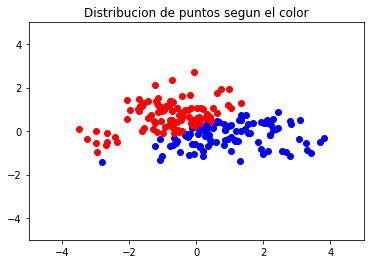

In [43]:
visualize_colors(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t)

AC: Ok, tenemos los datos simulados y las predicciones entregadas por el modelo de regresión lineal, ahora falta que aparezcan todos los puntos del plano y la linea negra que representa cuando la predicción es igual (o similar) a 0.5

### Generación de todos los puntos del gráfico
AC: Ahora se creará la función puntos_grafico(), la cual entreguerá todos los puntos de un gráfico cuyos límites deben ser dados.

In [54]:
def puntos_grafico(L1,L2,L3,L4,sep): #L1:abscisa(-), L2:abscisa(+), L3:ordenada(-), L4:ordenada(+), sep:separación entre puntos
    lista_puntos = []
    distancia_horizontal = np.abs(L2-L1)
    distancia_vertical = np.abs(L4-L3)
    numero_puntos_horizontales = (distancia_horizontal / sep) + 1
    numero_puntos_verticales = (distancia_vertical / sep) + 1
    pto_referencia = [L1,L3]   #siempre comenzaré desde el punto más negativo
    for i in range(int(numero_puntos_horizontales)):
        for j in range(int(numero_puntos_verticales)):
            lista_puntos.append(pto_referencia)
            pto_referencia = [pto_referencia[0],pto_referencia[1] + sep]
        pto_referencia = [pto_referencia[0] + sep, L3]
    return lista_puntos

Probemos

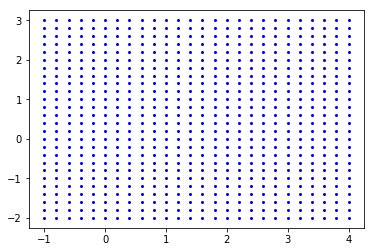

In [55]:
p=puntos_grafico(-1,4,-2,3,0.2)
p=np.array(p)
pT= p.transpose()
plt.plot(pT[0],pT[1],"bo",markersize = 2)
plt.show()

AC: Con esto podemos reproducir las figuras del libro "The Elements of Statistical Learning". Se comenzará evaluando, , en la función de predicción (funcion_lineal()), todos los puntos del plano, los cuales son dados por la función puntos_grafico(), juntos con los datos simulados anteriormente. Si el valor de la predicción es mayor a 0.5 el punto será clasificado como rojo, si es menor de 0.5 será azul y si es igual a 0.5 será negro.

AC: Para comenzar, generaré un nuevo SET que estará compuesto por todos los puntos del plano en estudio

In [56]:
SET_plano= puntos_grafico(-5,5,-5,5,0.2) #esto me entrega una lista con los puntos que viven en el plano, separados en 0.2
print(type(SET_plano),len(SET_plano))

<class 'list'> 2601


### Reproducción Figura 2.1

AC: Evaluamos cada punto del plano en la función funcion_lineal() y vemos si es mayor (será rojo), menor (será azul) o igual a 0.5 (será negro). Lamentablemente, ningún punto del plano, al pasar por la función funcion_lineal() me da un valor EXACTO de 0.5, por lo que ninguno de mis puntos está siendo clasificado como negro. Para arreglar esta situación puse un "margen de error" de 0.3, es decir, los puntos cuyas predicciones estuvieron entre 0.49 y 0.51 fueron clasificados como negros. 

In [78]:
lista_de_predicciones_azul_plano = []
lista_de_predicciones_rojo_plano = []
lista_de_predicciones_negro_plano = []

for pto in range(len(SET_plano)):
    
    prediccion = funcion_lineal(SET_plano[pto][0],SET_plano[pto][1],beta_teorico)
    
    if (prediccion < 0.49):
        lista_de_predicciones_azul_plano.append([SET_plano[pto][0], SET_plano[pto][1]])
        
    elif (0.49 <= prediccion <= 0.51):        #margen de error
        lista_de_predicciones_negro_plano.append([SET_plano[pto][0], SET_plano[pto][1]])
        
    else:
        lista_de_predicciones_rojo_plano.append([SET_plano[pto][0], SET_plano[pto][1]])


In [79]:
lista_de_predicciones_azul_plano = np.array(lista_de_predicciones_azul_plano)
lista_de_predicciones_rojo_plano = np.array(lista_de_predicciones_rojo_plano)
lista_de_predicciones_negro_plano = np.array(lista_de_predicciones_negro_plano)

In [80]:
lista_de_predicciones_azul_plano_t = lista_de_predicciones_azul_plano.transpose()
lista_de_predicciones_rojo_plano_t = lista_de_predicciones_rojo_plano.transpose()
lista_de_predicciones_negro_plano_t = lista_de_predicciones_negro_plano.transpose()

AC: Modificaré la función visualize_colors(), para que esta me pueda graficar todos los puntos del gráfico y los del SET original al mismo tiempo con puntos de diferente tamaños.

In [123]:
def visualize_colors_new(ptos_azul, ptos_rojo, ptos_azul_plano,ptos_rojo_plano,ptos_negro_plano):

    if len(ptos_azul_plano)==0 and len(ptos_rojo_plano)==0 and len(ptos_negro_plano)==0 : #en este caso estamos frente a la 
        x1azul = ptos_azul[0]                                                             #funcion visualize_colors() original
        x2azul = ptos_azul[1]
    
        x1rojo = ptos_rojo[0]
        x2rojo = ptos_rojo[1]
    
        plt.plot(x1azul,x2azul,"bo")
        plt.plot(x1rojo,x2rojo,"ro")
        plt.axis([-5,5,-5,5])
        plt.title("Distribucion de puntos segun el color")
        plt.show()
    
    else:
        x1azul = ptos_azul[0]
        x2azul = ptos_azul[1]
        x1rojo = ptos_rojo[0]
        x2rojo = ptos_rojo[1]
        
        x1azul_plano = ptos_azul_plano[0]
        x2azul_plano = ptos_azul_plano[1]
        x1rojo_plano = ptos_rojo_plano[0]
        x2rojo_plano = ptos_rojo_plano[1]
        x1negro_plano = ptos_negro_plano[0]
        x2negro_plano = ptos_negro_plano[1]
        
    
        plt.plot(x1azul,x2azul,"bo")
        plt.plot(x1rojo,x2rojo,"ro")
        plt.plot(x1azul_plano,x2azul_plano,"bo",markersize=1)
        plt.plot(x1rojo_plano,x2rojo_plano,"ro",markersize=1)
        plt.plot(x1negro_plano,x2negro_plano,"ko",markersize=2)
        plt.axis([-5,5,-5,5])
        plt.title("Distribucion de puntos segun el color")
        plt.show()

Probemos la función 

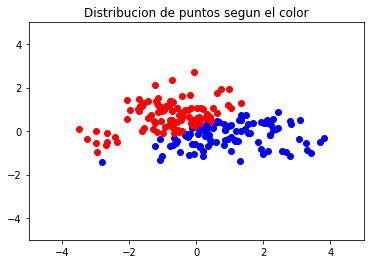

In [124]:
visualize_colors_new(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t,[],[],[])

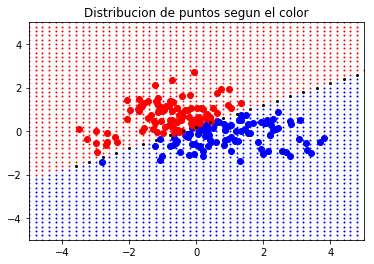

In [125]:
visualize_colors_new(lista_de_predicciones_azul_t, lista_de_predicciones_rojo_t,lista_de_predicciones_azul_plano_t,lista_de_predicciones_rojo_plano_t,lista_de_predicciones_negro_plano_t)

### Reproducción Figura 2.2

AC: En este caso debemos hacer lo mismo que hicimos anteriormente, pero en vez de usar funcion_lineal() ahora utilizaremos el método KNN para evaluar los puntos.

In [126]:
def MinimumDistance(punto,SET):
    distancia_min=1000
    for i in range(len(SET)):
        d=np.sqrt((SET[i][1]-punto[0])**2+(SET[i][2]-punto[1])**2)
        if d <= distancia_min:
            distancia_min=d
            punto_min=[SET[i][0],SET[i][1],SET[i][2],SET[i][3]]
    return distancia_min,punto_min                         #retorna la mínima distancia y el punto dentro de SET que la genera.

def k_puntos_mas_cercanos(pto,SET,k):
    set_copia =SET.copy()    #aquí genero esta copia porque no quiero que esta función me modifique el SET original
    lista_vecinos=[]
    for i in range(k+1):                                  #esto buscará k+1 veces para solucionar el problema de que la funcion
        punto_cercano = MinimumDistance(pto,set_copia)[1] #MinimumDistance() tome al mismo punto de prueba como un punto cercano
        lista_vecinos.append(punto_cercano)
        set_copia.remove(punto_cercano)
    if [lista_vecinos[0][1],lista_vecinos[0][2]] == pto:  #esto es TRUE cuando pto está en SET
        lista_vecinos.remove(lista_vecinos[0])      # aquí borro pto, ya que se estaba contando a si mismo como pto más cercano
        
    else:                                           #Si entra al else, quiere decir que el pto no se encuentra en SET
        lista_vecinos.pop()                         #Entonces borramos el último punto agregado a la lista (por eso puse
    return lista_vecinos                            # el for en un rango de k+1 

def promedio(lista_puntos):
    suma_total=0
    for elemento in lista_puntos:
        suma_total = suma_total + elemento[3]
    prom = suma_total / len(lista_puntos)    
    return prom

def prediccion_knn(SET,k):
    LISTA_AZUL=[]
    LISTA_ROJO=[]
    LISTA_NEGRO=[]
    for elemento in range(len(SET)):
        pto = [SET[elemento][1],SET[elemento][2]]
        lista_vecinos_cercanos=k_puntos_mas_cercanos(pto,SET,k)
        y_hat = promedio(lista_vecinos_cercanos)
        if y_hat > 0.5:
            LISTA_ROJO.append([SET[elemento][1],SET[elemento][2]])
        elif y_hat == 0.5 :
            LISTA_NEGRO.append([SET[elemento][1],SET[elemento][2]])    
        else:    
            LISTA_AZUL.append([SET[elemento][1],SET[elemento][2]])
    return LISTA_AZUL , LISTA_ROJO

AC: Ahora podemos hacer la predicción, la cual según la figura 2.2 del libro se hace con los 15 vecinos más cercanos.

In [129]:
puntosAzul_22,puntosRojo_22 = prediccion_knn(SET,15)

In [130]:
print(len(puntosAzul_22),len(puntosRojo_22))

100 100


In [132]:
puntosAzul_22 = np.array(puntosAzul_22)
puntosRojo_22 = np.array(puntosRojo_22)

In [133]:
puntosAzul_22_t = puntosAzul_22.transpose()
puntosRojo_22_t = puntosRojo_22.transpose()

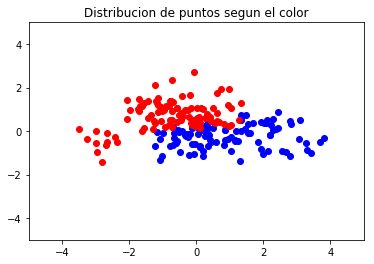

In [134]:
visualize_colors_new(puntosAzul_22_t, puntosRojo_22_t ,[],[],[])

AC: Ahora le agregamos los puntos del plano. En este caso debemos tener cuidado de que los vecinos cercanos con los que se compare cada punto del plano deben pertenecer al SET original (los datos simulados en un comienzo)

In [160]:
def prediccion_knn_plano(SET_plano,SET,k):
    LISTA_AZUL=[]
    LISTA_ROJO=[]
    LISTA_NEGRO=[]
    for elemento in range(len(SET_plano)):
        pto = [SET_plano[elemento][0],SET_plano[elemento][1]]
        lista_vecinos_cercanos=k_puntos_mas_cercanos(pto,SET,k)
        y_hat = promedio(lista_vecinos_cercanos)
        if y_hat > 0.53:
            LISTA_ROJO.append([SET_plano[elemento][0],SET_plano[elemento][1]])
        elif 0.46 <= y_hat <= 0.54:
            LISTA_NEGRO.append([SET_plano[elemento][0],SET_plano[elemento][1]])    
        else:    
            LISTA_AZUL.append([SET_plano[elemento][0],SET_plano[elemento][1]])
    return LISTA_AZUL , LISTA_ROJO , LISTA_NEGRO 

In [161]:
azul_knn_plano_22 , rojo_knn_plano_22 , negro_knn_plano_22 = prediccion_knn_plano(SET_plano,SET,15)

In [162]:
print(len(azul_knn_plano_22),len(rojo_knn_plano_22),len(negro_knn_plano_22))

1268 1280 53


In [163]:
azul_knn_plano_22 = np.array(azul_knn_plano_22)
rojo_knn_plano_22 = np.array(rojo_knn_plano_22)
negro_knn_plano_22 = np.array(negro_knn_plano_22)

azul_knn_plano_22_t = azul_knn_plano_22.transpose()
rojo_knn_plano_22_t = rojo_knn_plano_22.transpose()
negro_knn_plano_22_t = negro_knn_plano_22.transpose()

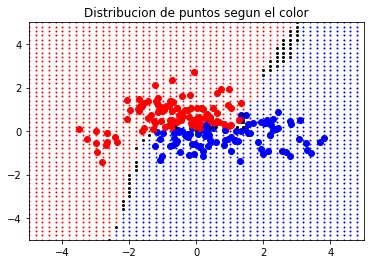

In [164]:
visualize_colors_new(puntosAzul_22_t, puntosRojo_22_t ,azul_knn_plano_22_t,rojo_knn_plano_22_t,negro_knn_plano_22_t)

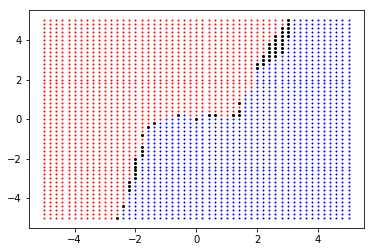

In [165]:
plt.plot(azul_knn_plano_22_t[0],azul_knn_plano_22_t[1],"bo",markersize=1)
plt.plot(rojo_knn_plano_22_t[0],rojo_knn_plano_22_t[1],"ro",markersize=1)
plt.plot(negro_knn_plano_22_t[0],negro_knn_plano_22_t[1],"ko",markersize=2)
plt.show()

### Reproducción Figura 2.3

Es el mismo procedimiento detrás de la figura 2.2, sólo que ahora se usa un vecino cercano.